# Spatial Analysis and Prediction of Car Accidents
## Inferential Statistics

### Chester Hitz | Springboard Data Science Career Track | Capstone II

--------------------------------------------------------------------------

The goal of this unit of my second capstone project is to take the dataset I created in the previous step, which lists various features of 77k one-kilometer segments of the US interstate system, and attempt to understand their relationship to the target variable, the number of accidents that has occured on them between 2010 and 2017.

The dataset is imported below and previewed, with columns listed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('CapstoneII_Data_wrangled.csv')
df.head(10)

,uID,Accidents_Total,FAF4_ID,STATE,URBAN_CODE,FAFZONE,SIGN1,THRULANES,SPD_LIMIT,TERRAIN,MEDIAN,ACCESS,CurveIndex,Traffic_Volume,Accidents_Per_100k,Truck_Volume,Truck_Percentage
0,I296,0,510699,MI,34300.0,262,I296,8,70,1,2,1,0.051600,91500.0,0.000000,4861.0,0.053126
1,I296,0,510700,MI,34300.0,262,I296,6,70,1,7,1,0.035131,98400.0,0.000000,4861.0,0.049400
2,I296,2,508498,MI,34300.0,262,I296,6,70,1,7,1,0.000807,110100.0,0.181653,4861.0,0.044151
3,I296,0,509699,MI,34300.0,262,I296,6,70,1,7,1,0.001250,110100.0,0.000000,4861.0,0.044151
4,I296,0,509674,MI,34300.0,262,I296,6,70,1,7,1,0.000778,106500.0,0.000000,6387.0,0.059972
5,I296,0,509674,MI,34300.0,262,I296,6,70,1,7,1,0.001335,106500.0,0.000000,6387.0,0.059972
6,I255,0,325817,MO,77770.0,292,I255,8,60,2,7,1,0.005598,113442.0,0.000000,13284.0,0.117099
7,I255,2,325817,MO,77770.0,292,I255,8,60,2,7,1,0.003734,113442.0,0.176302,13284.0,0.117099
8,I255,0,325855,MO,77770.0,292,I255,6,60,2,7,1,0.003418,113442.0,0.000000,13284.0,0.117099
9,I255,0,325854,MO,77770.0,292,I255,6,60,2,1,1,0.000294,52006.0,0.000000,5066.0,0.097412


### Target Variable: Number of Car Crashes

Looking at our the number of accidents on different road segments, we can see that it is extremely sparse. The median value is 0, and the mean is is only .12. We can see this when attempting to plot a histogram, as the values for 0 overwhelm further values.

count    70925.000000
mean         0.129489
std          0.665343
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         41.000000
Name: Accidents_Total, dtype: float64


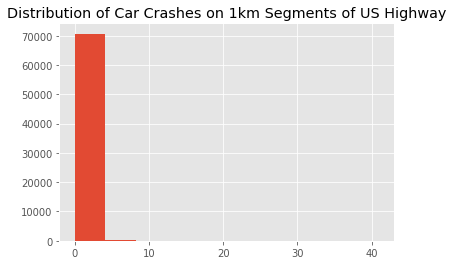

In [3]:
print(df.Accidents_Total.describe())

plt.hist(df.Accidents_Total)
plt.title('Distribution of Car Crashes on 1km Segments of US Highway')
plt.show()

Filtering out segments with 0 car crashes show that low values still dominate.

2     1786
3      939
4      303
5      126
6       61
7       28
8       15
9        6
10       4
11       3
16       2
15       1
13       1
17       1
14       1
12       1
41       1
Name: Accidents_Total, dtype: int64


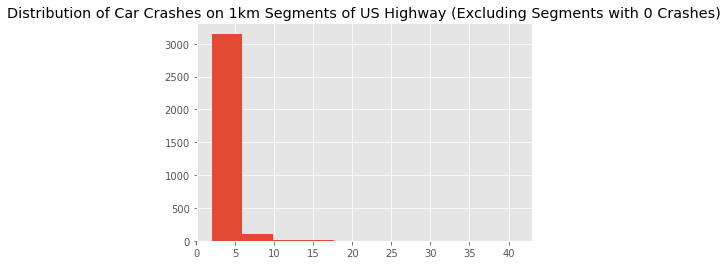

In [4]:
filtered = df[df.Accidents_Total > 1].Accidents_Total

print(filtered.value_counts())

plt.hist(filtered)
plt.title('Distribution of Car Crashes on 1km Segments of US Highway (Excluding Segments with 0 Crashes)')
plt.show()

However, the number of accidents on a given road segment is meaningless without a normalizing variable that accounts for the volume of traffic flow through it. That is why the target variable here is the number of accidents divided by units of 100k cars that pass through, giving the series Accidents per 100k. The distribution of that variable looks like this:

In [5]:
df.Accidents_Per_100k.describe()

count    70923.000000
mean         0.037529
std          0.333960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.549898
Name: Accidents_Per_100k, dtype: float64

Similar to the non-normalized variable, the distribution skews left and extremely hard towards 0.

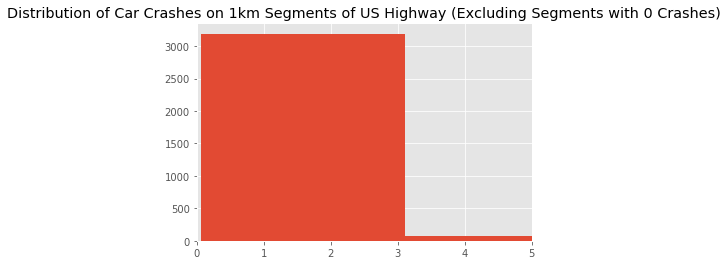

In [6]:
accidents_per_100k = df.Accidents_Per_100k
accidents_per_100k.dropna(inplace=True)
filtered = accidents_per_100k[accidents_per_100k != 0]


plt.hist(filtered)
plt.xlim(0,5)
plt.title('Distribution of Car Crashes on 1km Segments of US Highway (Excluding Segments with 0 Crashes)')
plt.show()

### Independent Variables

These are the independent variables available in the dataset.

* FAF4_ID: Unique identifier not for the individual segment, but for the larger segment the 1km segment belongs to.
* STATE: The state the segment is located in.
* URBAN_CODE: A unique code for different urban regions.
* FAFZONE: The regional zone for the Freight Analysis Framework model.
* SIGN1: The unique identifier of the highway route.
* THRULANES: The number of through lanes on the highway.
* SPD_LIMIT: The speed limit on the highway.
* TERRAIN: The type of terrain. 1 is level, 2 is rolling and 3 is mountainous. Exact code descriptions [here]()
* MEDIAN: The type of median. Ranges from 1-7, with 1 being no barrier and 7 being a rigid barrier. More information can be found [here]()
* ACCESS: Denotes how the highway is accessed from other roadways. A value of 1 indicates at-grade crossings, 2 has stoplights and intersections, and 3 is full access including provate driveways.
* CurveIndex: A measurement of the curviness of a road segment. A straight segment has a value of 0, while a perfect circle would have a value of 1.

Let's run a correlation check on the factors to the target variable.

In [7]:
df.corr()['Accidents_Per_100k']

Accidents_Total       0.527471
FAF4_ID              -0.019672
URBAN_CODE            0.007797
FAFZONE               0.009237
THRULANES            -0.016324
SPD_LIMIT             0.017230
TERRAIN              -0.005498
MEDIAN               -0.009286
ACCESS               -0.001367
CurveIndex            0.001533
Traffic_Volume       -0.022252
Accidents_Per_100k    1.000000
Truck_Volume         -0.014511
Truck_Percentage      0.018535
Name: Accidents_Per_100k, dtype: float64

There is nothing here that shows strong correlation, which is troubling. No factor, except for the total number of accidents, breaks >.2 correlation. This presents a serious problem for the data and the goal of this capstone.
To refresh, the question was: Can we use the characteristics of roads to predict for the frequency of accidents along them? Based on this initial data exploration, the answer seems to be: **No**.

The main issue is that the data is so sparse. To illustrate this, I've quickly trained a linear regressor in sci-kit learn to predict for accident rates, and found that it did virtually no better at predicting accident rates than a dummy array with every value set to zero:

In [10]:
# import relevant scikit-learn functions
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer

# create an imputer object for NaN values
imp = Imputer(missing_values='NaN', strategy='median', axis=1)

# drop unnecessary roads
df_crashes = df.drop(['uID', 'Accidents_Total', 'FAF4_ID', 'STATE', 'URBAN_CODE', 'FAFZONE',
                     'SIGN1','Traffic_Volume', 'CurveIndex','Truck_Volume'], axis=1)
df_crashes = df_crashes.dropna(how='any')

df_features_wNaN = df_crashes.drop('Accidents_Per_100k',axis = 1)
df_features = pd.DataFrame(imp.fit_transform(df_features_wNaN))
df_features.columns = df_features_wNaN.columns
X_train, X_holdout, y_train, y_holdout = train_test_split(df_features, df.Accidents_Per_100k, test_size = .2, random_state=24)

lr = LinearRegression().fit(X_train, y_train)
lr_prediction = lr.predict(X_holdout)

holdout_rmse = np.sqrt(mean_squared_error(lr_prediction, y_holdout))

print('RMSE real: ', holdout_rmse)
print('RMSE dummy: ', np.sqrt(mean_squared_error(np.zeros((14185,)), y_holdout)))

RMSE real:  0.385513833082
RMSE dummy:  0.387704173039


That is to say, predicting a 0/10000 crash frequency was virtually as predictive as a linear regression model. This is because the factors of the road themselves do not provide enough predictive power, as shown by the correlation numbers.

## What now?

Unfortunately, when asking the "using x, can we predict y?" question in data science, you are not always going to get "Yes" as an answer. In this case, the answer seems to be no. The rate of accidents seems not to depend so much on the road characteristics, but rather different underlying factors about the accidents themselves. Understanding that, I am going to pivot my efforts towards predicting factors *about* the accidents rather than the frequency of the accidents themselves. In this case, I want to answer the question:

I will continue with this work in a new notebook [here]()